 # Logistic Regression 
 ## dataset for bank

In [1]:
# import necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# load the dataset
df=pd.read_csv('https://raw.githubusercontent.com/AliHumadi2000/LogisticRegression_/main/bank-full.csv')

# EDA 
## explore the dataset 

In [3]:
#show the dataset attributes
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# shape of the data set
[r,c]=df.shape
print('number of rows: ',r)
print('number of columns: ',c)

number of rows:  45211
number of columns:  17


In [6]:
# see the datatypes
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

<h3> As we can see there some catagorichal feature we need to convert them into numerical 

In [7]:
# see the stucture of the numerical varaible 
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [8]:
#see the info about whole data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#see if there is missing or duplicated value 
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#no duplicated not missing value 

In [12]:
# see the structure of data 
numeric_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [13]:
df[categorical_data.columns]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [14]:
df[categorical_data.columns].value_counts


<bound method DataFrame.value_counts of                 job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome    y  
0       may  unknow

In [15]:
# convert numerical data into catagorucal using Dummy variables ar
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [16]:
df['y'].value_counts()
#0 -> 39922 rows
#1-> 5289

0    39922
1     5289
Name: y, dtype: int64

# visualization

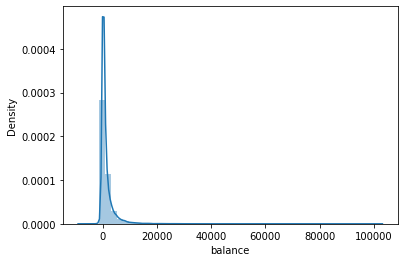

In [17]:
# see the distribution for numerical columns balanc and duraiton 

sns.distplot(df['balance'])
plt.show()

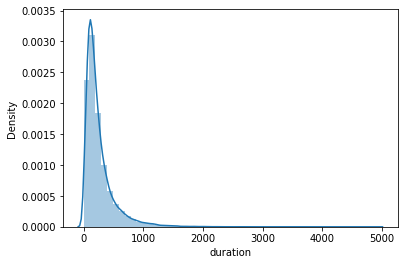

In [18]:
# duration
sns.distplot(df['duration'])
plt.show()

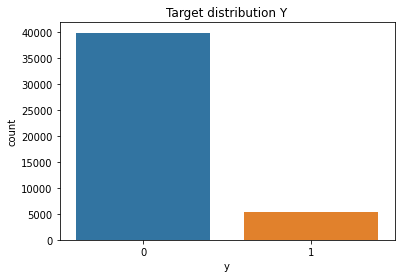

In [19]:
plt.title('Target distribution Y')
sns.countplot(df['y'])
plt.show()

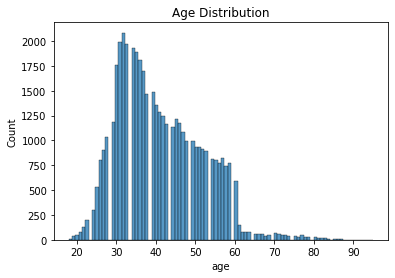

In [20]:
plt.title("Age Distribution")
sns.histplot(df['age'])
plt.show()

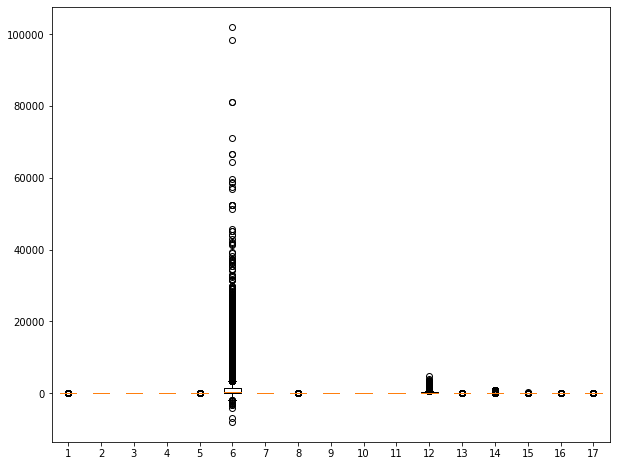

In [21]:
# checking from outliers
plt.figure(figsize=(10,8))
plt.boxplot(df)
plt.show()
# we can observe that columns 6 ,12 have many outliers

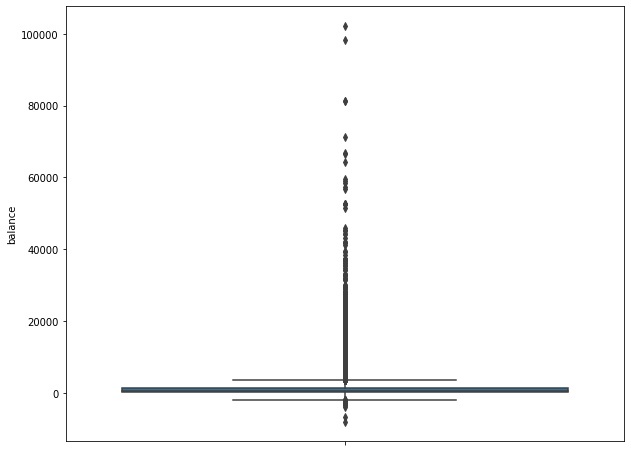

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(y='balance',data=df)
plt.show()

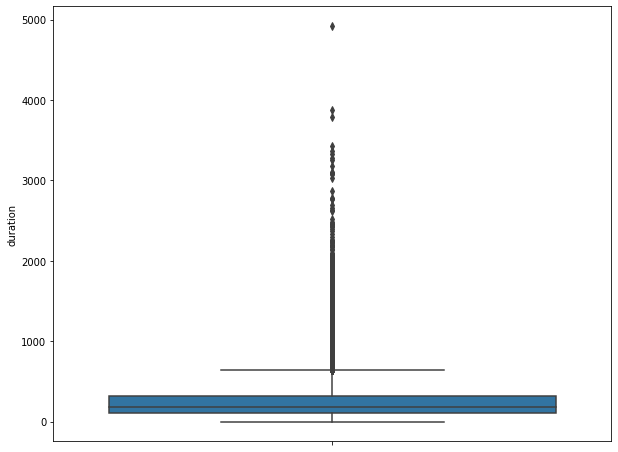

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(y='duration',data=df)
plt.show()

In [24]:
#function to find the outlier
def outlierDetect(X):
    Q1 = np.percentile(X, 25, interpolation = 'midpoint')  
    Q3 = np.percentile(X, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    return low_lim,up_lim

In [25]:
#run it 7 times 
for i in range(10):
    lower,uper=outlierDetect(df['balance'])
    df=df[(df['balance']<uper )&(df['balance']>lower)]
    lower,uper=outlierDetect(df['duration'])
    df=df[(df['duration']<uper )&(df['duration']>lower)]
    print(df.shape)

(37570, 17)
(34039, 17)
(32227, 17)
(31266, 17)
(30750, 17)
(30441, 17)
(30301, 17)
(30189, 17)
(30114, 17)
(30075, 17)


<AxesSubplot:ylabel='balance'>

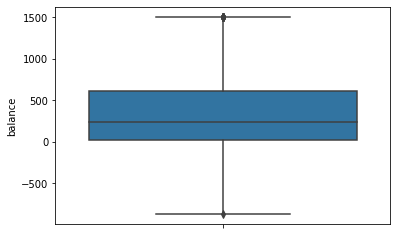

In [27]:
sns.boxplot(y=df.balance)

In [39]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021191,-0.404310,-0.113280,-0.013724,0.054202,-0.162036,0.002593,0.032022,-0.001715,-0.055336,-0.024566,0.009635,-0.031665,-0.011845,0.017065,0.006319
job,-0.021191,1.000000,0.060072,0.168130,-0.007059,0.006172,-0.131556,-0.030916,-0.082686,0.028570,-0.102875,-0.002125,0.007556,-0.031222,-0.002653,0.015802,0.045483
marital,-0.404310,0.060072,1.000000,0.110542,-0.007118,0.027986,-0.020501,-0.046181,-0.040640,-0.004567,-0.006765,0.013491,-0.008162,0.025737,0.019380,-0.025880,0.059170
education,-0.113280,0.168130,0.110542,1.000000,-0.010236,0.048236,-0.091159,-0.044866,-0.111592,0.025041,-0.064694,-0.002788,0.002867,-0.004593,0.015910,-0.017664,0.076840
default,-0.013724,-0.007059,-0.007118,-0.010236,1.000000,-0.142353,-0.017084,0.070521,0.017032,0.009964,0.017342,-0.002203,0.018966,-0.034908,-0.016274,0.038291,-0.027613
balance,0.054202,0.006172,0.027986,0.048236,-0.142353,1.000000,-0.027216,-0.086947,-0.029290,-0.010719,-0.027655,0.026529,-0.032573,0.038820,0.032912,-0.054277,0.074968
housing,-0.162036,-0.131556,-0.020501,-0.091159,-0.017084,-0.027216,1.000000,0.024542,0.195289,-0.056156,0.305560,0.006697,-0.033936,0.142341,0.047121,-0.116440,-0.155123
loan,0.002593,-0.030916,-0.046181,-0.044866,0.070521,-0.086947,0.024542,1.000000,-0.011755,0.008418,0.022310,-0.008153,0.013523,-0.026550,-0.009411,0.015785,-0.072559
contact,0.032022,-0.082686,-0.040640,-0.111592,0.017032,-0.029290,0.195289,-0.011755,1.000000,-0.043555,0.399326,-0.018487,0.004391,-0.242689,-0.135410,0.272948,-0.147062
day,-0.001715,0.028570,-0.004567,0.025041,0.009964,-0.010719,-0.056156,0.008418,-0.043555,1.000000,-0.046190,-0.061321,0.178769,-0.099136,-0.053897,0.089895,-0.027928


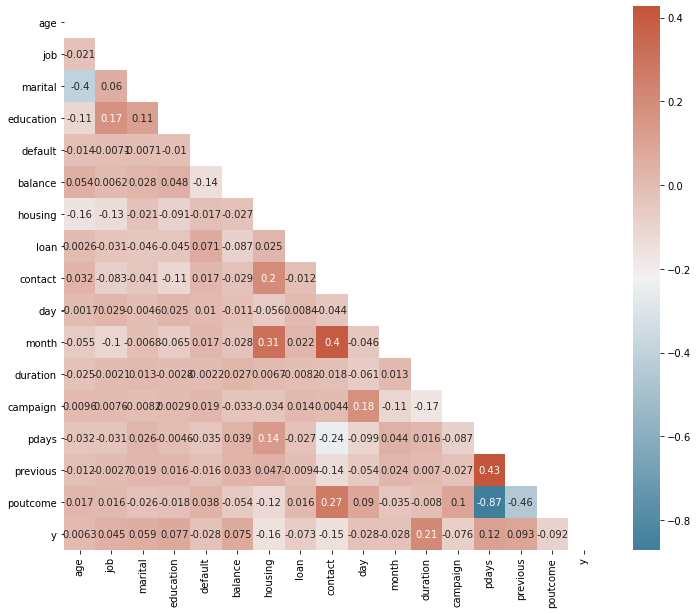

In [38]:
# see the relation and correlation
corr=df.corr()
#Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap

sns.heatmap(corr,annot=True, mask = mask, cmap=cmap)
plt.show()

In [ ]:
#we cant find colinearity


# Model Creation 

In [42]:
x=df.drop(columns='y',axis=1,inplace=False)
y=df['y']
x.shape,y.shape

((30075, 16), (30075,))

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

In [44]:
# scale train,and test 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [45]:
X_train,X_test

(array([[-0.81230315, -1.29566442,  1.35700045, ..., -0.40369823,
         -0.2877926 ,  0.43573807],
        [-0.61680534, -0.39020717,  1.35700045, ..., -0.37434921,
          0.24256049, -1.59936976],
        [-0.81230315, -1.29566442,  1.35700045, ..., -0.40369823,
         -0.2877926 ,  0.43573807],
        ...,
        [-0.51905643,  0.51525009, -0.27408467, ...,  3.00078788,
          1.30326665, -2.61692367],
        [-0.51905643,  1.42070734,  1.35700045, ..., -0.40369823,
         -0.2877926 ,  0.43573807],
        [-0.51905643, -0.08838808, -0.27408467, ..., -0.40369823,
         -0.2877926 ,  0.43573807]]),
 array([[-0.51905643,  0.81706917, -0.27408467, ..., -0.40369823,
         -0.2877926 ,  0.43573807],
        [-0.91005205, -0.39020717, -1.90516979, ..., -0.40369823,
         -0.2877926 ,  0.43573807],
        [-0.61680534, -0.99384534, -0.27408467, ..., -0.40369823,
         -0.2877926 ,  0.43573807],
        ...,
        [-0.42130753, -1.29566442,  1.35700045, ...,  

In [48]:
#model 
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [50]:
#predict
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

# Model Evalution 

In [53]:
# Accuracy, Confusion matrix, and classification report
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

print("Accuracy is: ",accuracy_score(y_test,y_predict))

Accuracy is:  0.9386533665835411


In [54]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5639
           1       0.56      0.09      0.15       376

    accuracy                           0.94      6015
   macro avg       0.75      0.54      0.56      6015
weighted avg       0.92      0.94      0.92      6015



In [55]:
print(confusion_matrix(y_test,y_predict))

[[5614   25]
 [ 344   32]]


# Prediction model

In [61]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0


In [82]:
#take subset from the dataset
df_new=X_train[:6]
#test
t=y_test[:6]
pr=np.asanyarray(df_new)
pr=pr.reshape(1,-1)
#scal the data
print(t)

print(model.predict(df_new))



33345    0
38608    0
36521    0
11719    0
14038    0
29220    0
Name: y, dtype: int32
[0 0 0 0 0 0]
